In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Формат : две станции записаны в одной строке, если между ними есть перегон.
# Создать/найти csv файл с описанием связи между станциями метрополитена Казани

metro_data = pd.read_csv("out_kazan.csv")

metro_data.head()

,Unnamed: 0,Start,End
0,0,Авиастроительная(тат. Авиатөзелеш),Северный вокзал(тат. Төньяк вокзалы)
1,1,Северный вокзал(тат. Төньяк вокзалы),Яшьлек(тат. Яшьлек)
2,2,Яшьлек(тат. Яшьлек),Козья слобода(тат. Кәҗә бистәсе)
3,3,Козья слобода(тат. Кәҗә бистәсе),Кремлёвская(тат. Кремль)
4,4,Кремлёвская(тат. Кремль),Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәй...


Общее число станций

In [36]:
len(metro_data['Start'].unique())

10

In [5]:
kazan_metro_graph = nx.from_pandas_edgelist(metro_data, source='Start', target='End')

# Указываем, что направление перегона между станциями нас не интересует.
# (как правило, можем поехать в обе стороны)
kazan_metro_graph = nx.to_undirected(kazan_metro_graph)

print(nx.info(kazan_metro_graph))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 10
Average degree:   1.8182


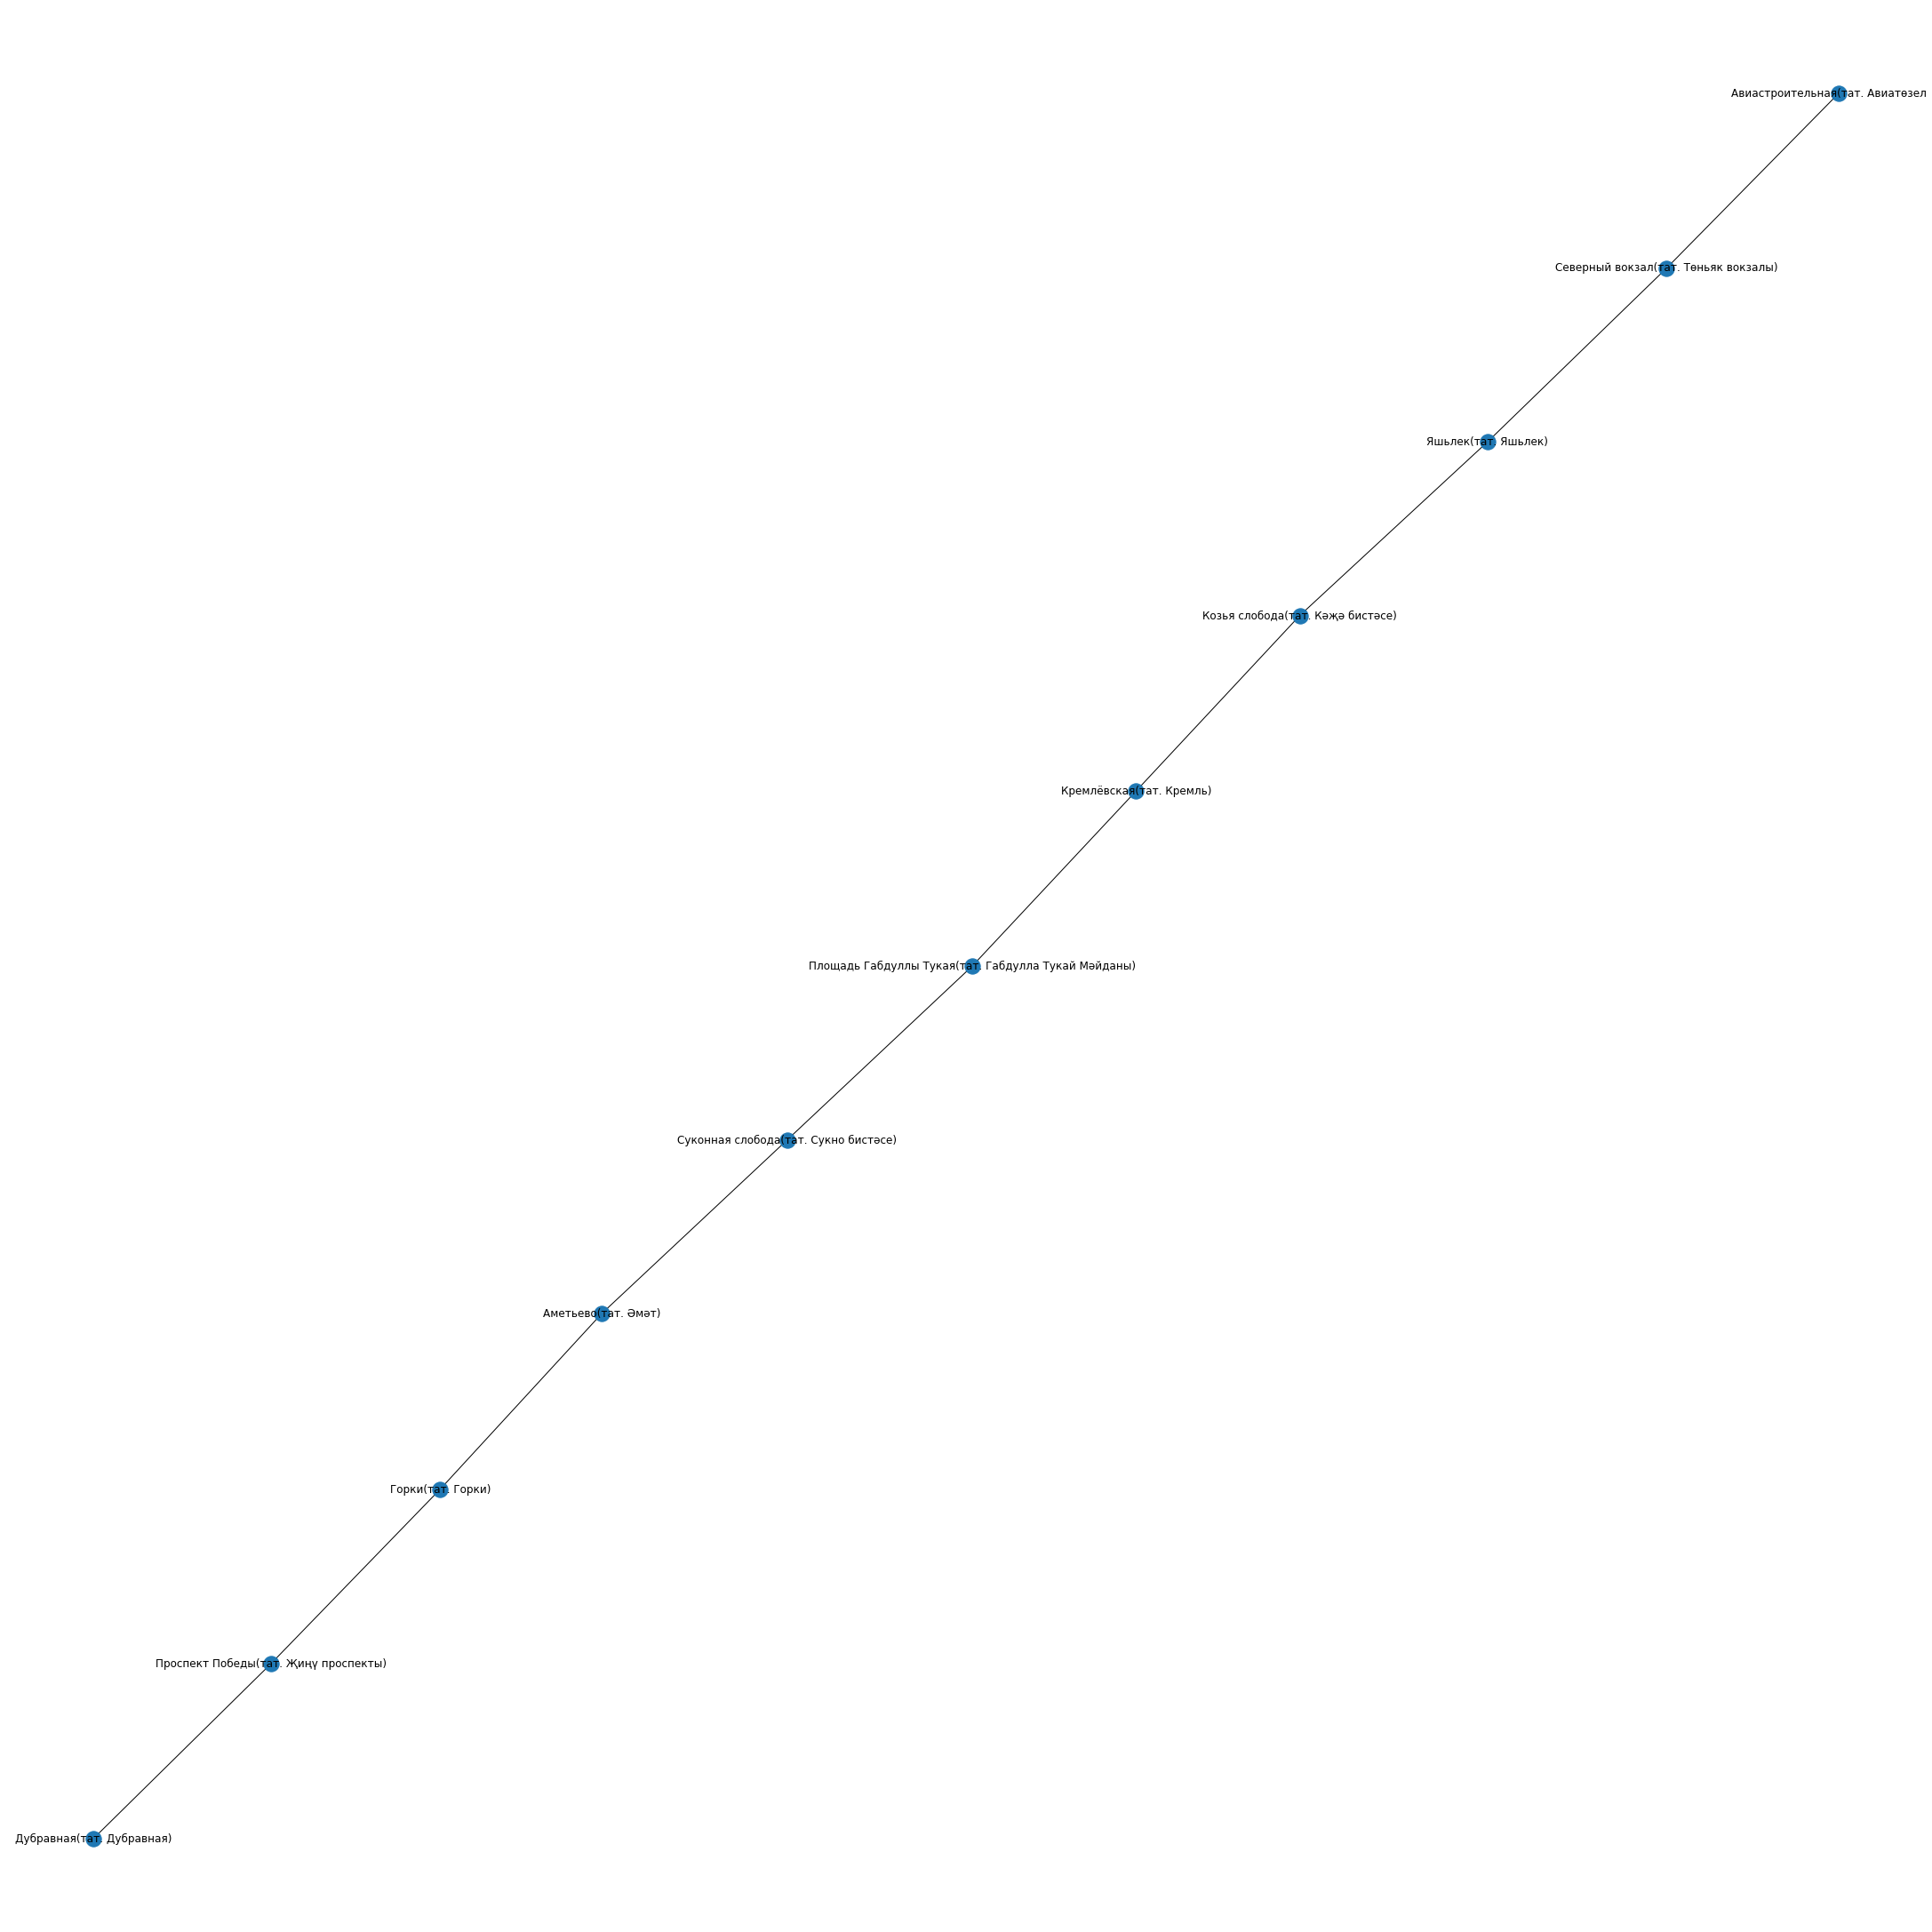

In [38]:
plt.figure(figsize=(30, 30)) 

# здесь я использую эту функцию для отрисовки, потому что ветка всего одна и чтобы она была прямая
nx.draw_kamada_kawai(kazan_metro_graph, with_labels=True)

plt.savefig('kazan_metro.png', bbox_inches='tight')

In [39]:
dict(kazan_metro_graph.degree)

{'Авиастроительная(тат. Авиатөзелеш)': 1,
 'Северный вокзал(тат. Төньяк вокзалы)': 2,
 'Яшьлек(тат. Яшьлек)': 2,
 'Козья слобода(тат. Кәҗә бистәсе)': 2,
 'Кремлёвская(тат. Кремль)': 2,
 'Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәйданы)': 2,
 'Суконная слобода(тат. Сукно бистәсе)': 2,
 'Аметьево(тат. Әмәт)': 2,
 'Горки(тат. Горки)': 2,
 'Проспект Победы(тат. Җиңү проспекты)': 2,
 'Дубравная(тат. Дубравная)': 1}

Text(0, 0.5, 'Кол-во станций')

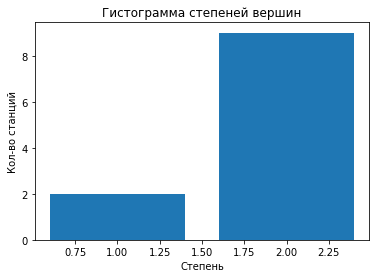

In [40]:
vals_of_degree = dict(kazan_metro_graph.degree).values()

d = dict()

for val in vals_of_degree:
    if d.get(val) is None:
        d[val] = 1
    else:
        d[val] += 1
        
plt.bar(d.keys(), d.values())
plt.title('Гистограмма степеней вершин')
plt.xlabel('Степень')
plt.ylabel('Кол-во станций')

In [58]:
get_greatest_node(kazan_metro_graph)

('Проспект Победы(тат. Җиңү проспекты)', 2)

In [45]:
metro_data[(metro_data['Start'] == xres[0])]

,Unnamed: 0,Start,End
9,9,Проспект Победы(тат. Җиңү проспекты),Дубравная(тат. Дубравная)


In [47]:
nx.shortest_path(kazan_metro_graph, 'Кремлёвская(тат. Кремль)', 'Проспект Победы(тат. Җиңү проспекты)')

['Кремлёвская(тат. Кремль)',
 'Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәйданы)',
 'Суконная слобода(тат. Сукно бистәсе)',
 'Аметьево(тат. Әмәт)',
 'Горки(тат. Горки)',
 'Проспект Победы(тат. Җиңү проспекты)']

In [60]:
nx.single_source_shortest_path(kazan_metro_graph, 'Проспект Победы(тат. Җиңү проспекты)')

{'Проспект Победы(тат. Җиңү проспекты)': ['Проспект Победы(тат. Җиңү проспекты)'],
 'Горки(тат. Горки)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Горки(тат. Горки)'],
 'Дубравная(тат. Дубравная)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Дубравная(тат. Дубравная)'],
 'Аметьево(тат. Әмәт)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Горки(тат. Горки)',
  'Аметьево(тат. Әмәт)'],
 'Суконная слобода(тат. Сукно бистәсе)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Горки(тат. Горки)',
  'Аметьево(тат. Әмәт)',
  'Суконная слобода(тат. Сукно бистәсе)'],
 'Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәйданы)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Горки(тат. Горки)',
  'Аметьево(тат. Әмәт)',
  'Суконная слобода(тат. Сукно бистәсе)',
  'Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәйданы)'],
 'Кремлёвская(тат. Кремль)': ['Проспект Победы(тат. Җиңү проспекты)',
  'Горки(тат. Горки)',
  'Аметьево(тат. Әмәт)',
  'Суконная слобода(тат. Сукно бистәсе)',
  'Площадь Габдуллы Тукая(тат. Габд

In [71]:
# Функция для выделения цветом путей, пример использования ниже.
# https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb
def plot_paths(G, paths):
    plt.figure(figsize=(25, 25))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=4000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

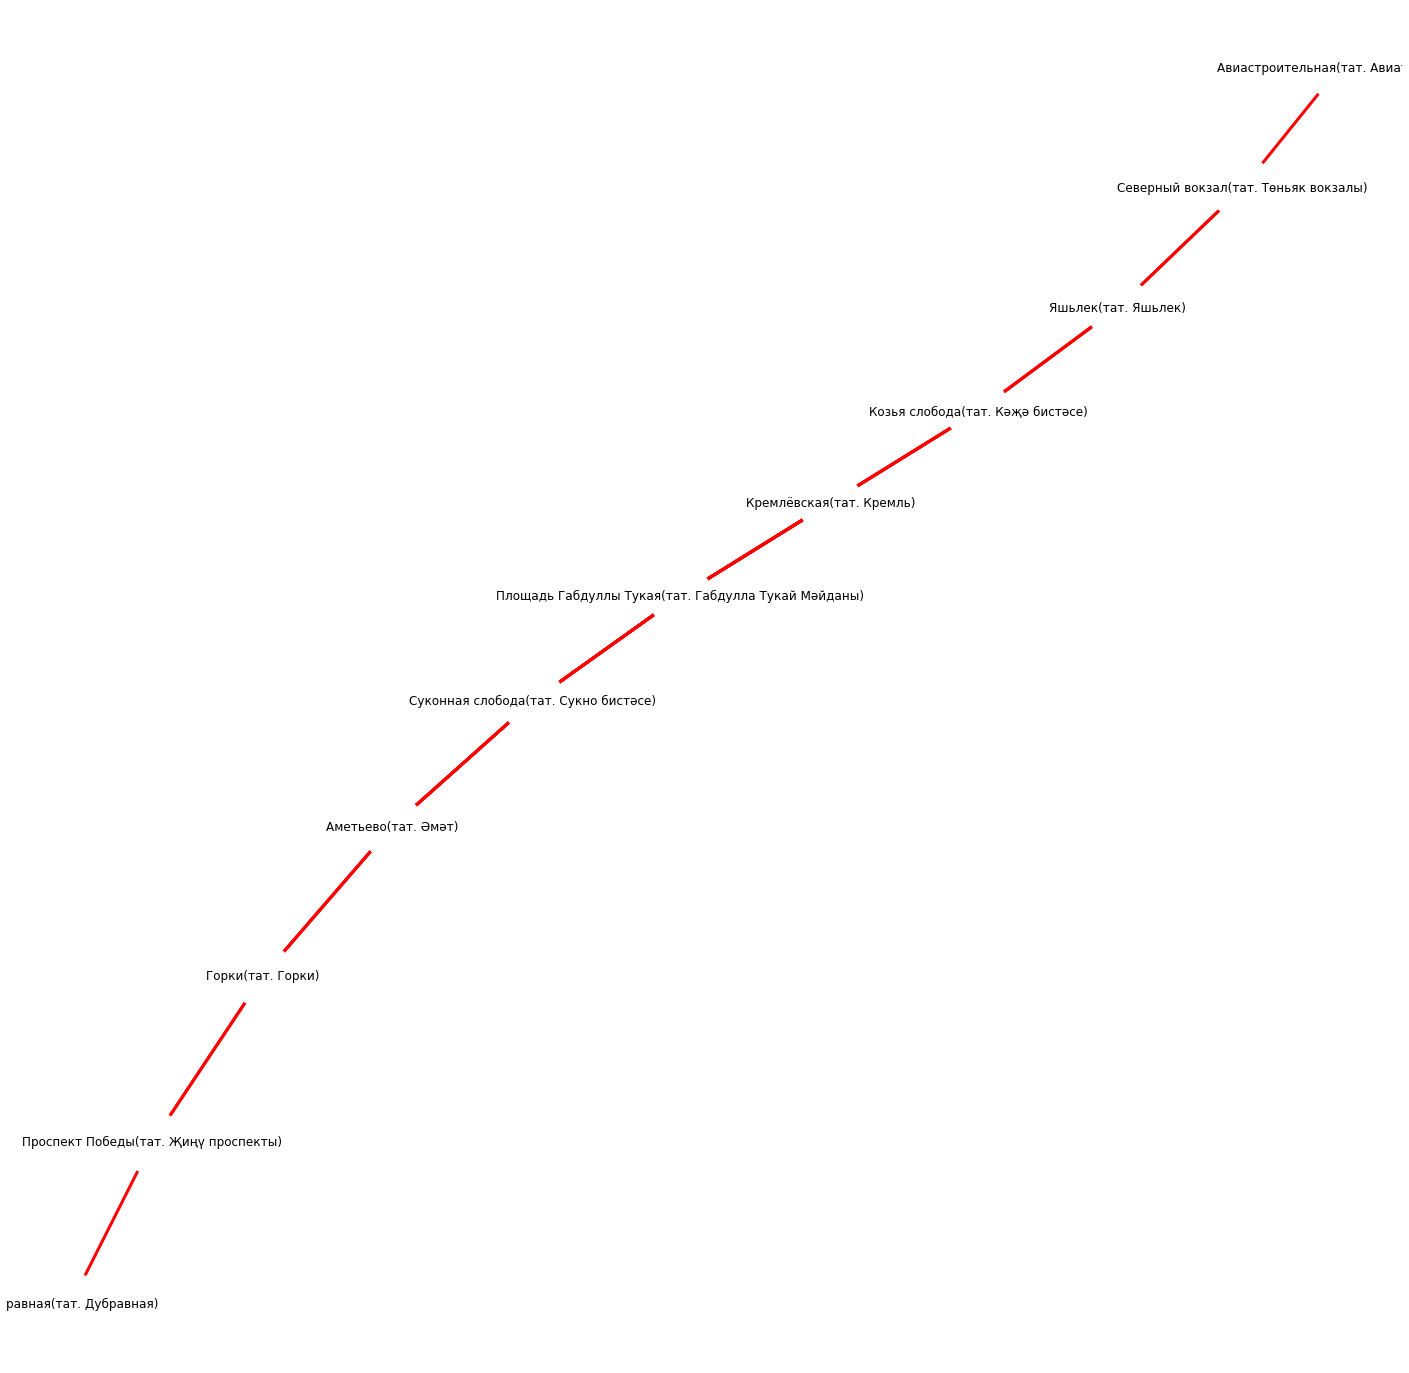

In [72]:
# Вывод кратчайших путей из одной вершины до всех остальных.
plot_paths(kazan_metro_graph, nx.single_source_shortest_path(kazan_metro_graph, 'Кремлёвская(тат. Кремль)').values())

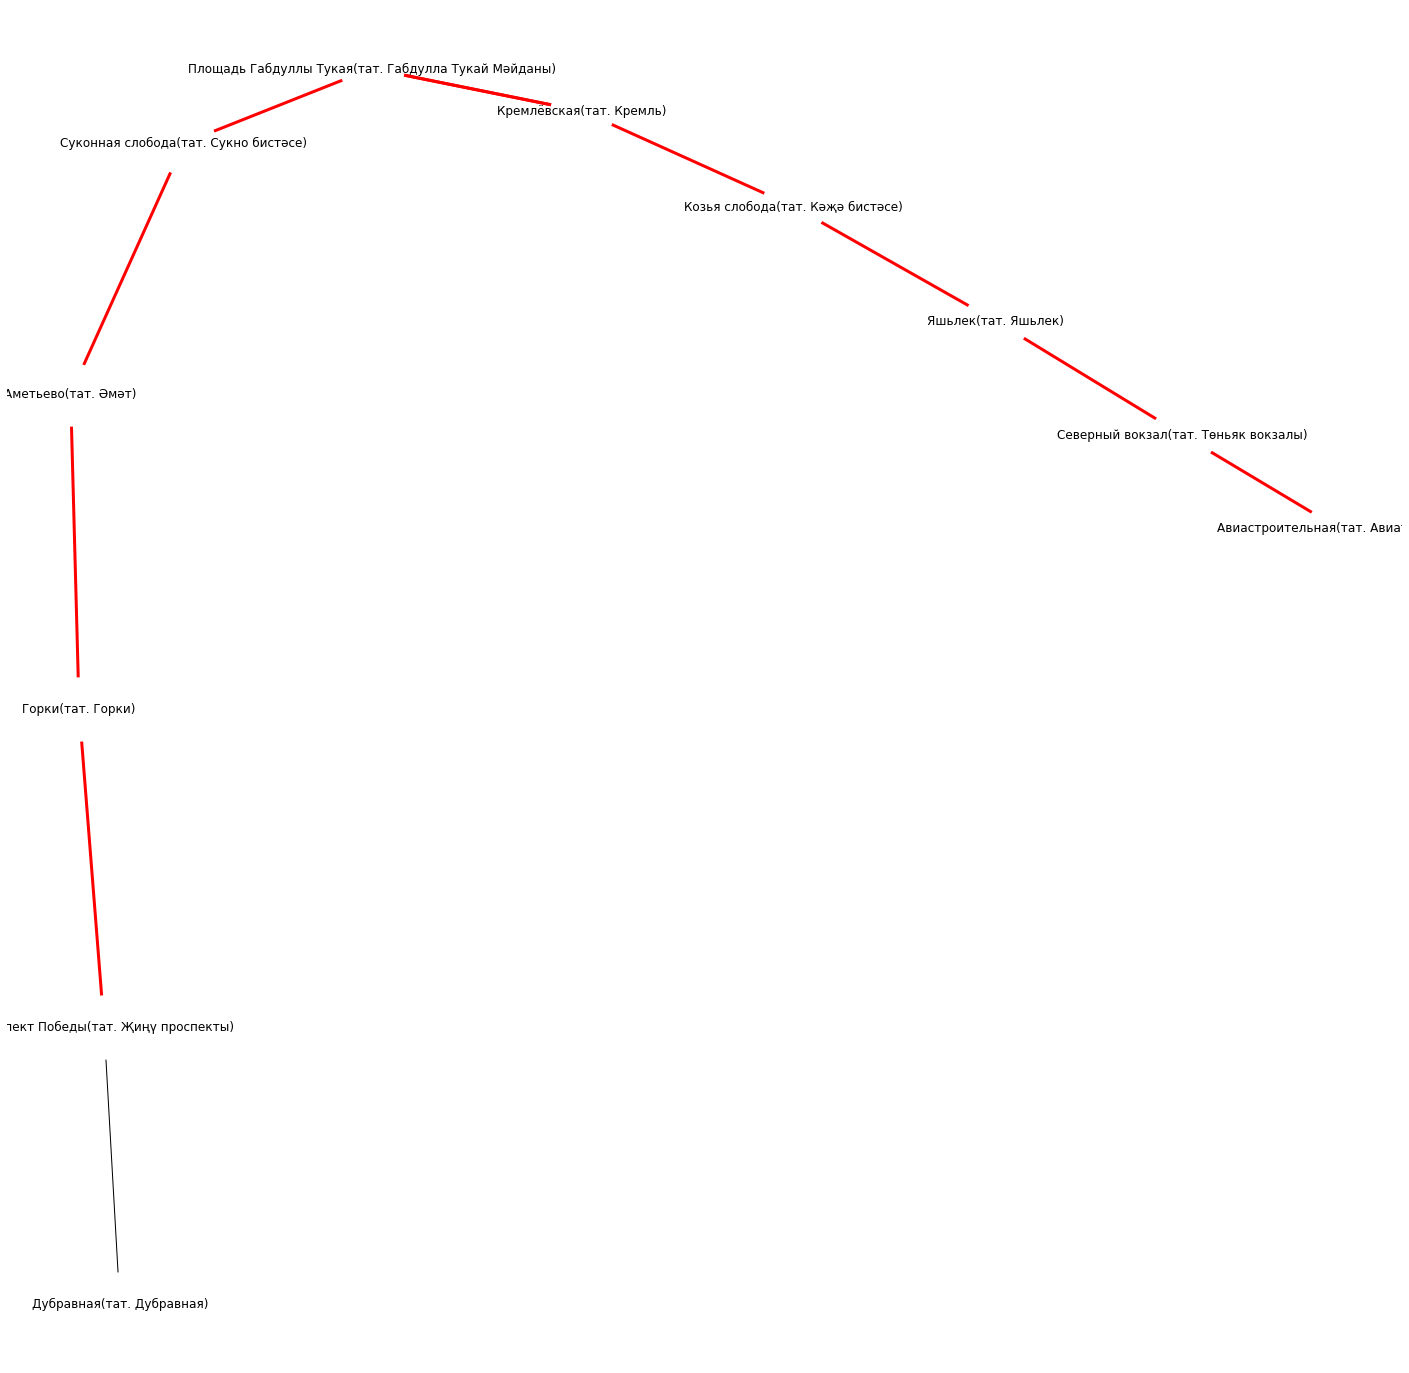

In [74]:
# Вывод нескольких кратчайших путей между конкретными парами вершин.
plot_paths(
    kazan_metro_graph,
    [
        nx.shortest_path(kazan_metro_graph, 'Кремлёвская(тат. Кремль)', 'Проспект Победы(тат. Җиңү проспекты)'),
        nx.shortest_path(kazan_metro_graph, 'Авиастроительная(тат. Авиатөзелеш)', 'Площадь Габдуллы Тукая(тат. Габдулла Тукай Мәйданы)')
    ]
)

In [8]:
plt.figure(figsize=(30, 30))

# nx.draw_circular(metro_graph, with_labels=False)
# nx.draw_circular(draw_spectral)
# nx.draw_circular(draw_random)

nx.draw_networkx(kazan_metro_graph, with_labels=False, node_color=list(mcolors.CSS4_COLORS.keys()))

NameError: name 'mcolors' is not defined

<Figure size 2160x2160 with 0 Axes>